In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

In [28]:
# https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = sk.datasets.load_iris()
print "Values available from dataset\n", iris.keys()
df = pd.DataFrame(iris.data, columns=[iris.feature_names])
df['target'] = iris.target
#df['color'] = df.Set.map( lambda x: 'red' if x == 'Z' else 'green')
#df['color'] = ['red' if x == 'Z' else 'green' for x in df['Set']]

df['names'] = df.target.map(lambda x: 'I. setosa' if x == 0 else ('I. versicolor' if x == 1 else 'I. virginica'))
df.head()

Values available from dataset
['target_names', 'data', 'target', 'DESCR', 'feature_names']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,names
0,5.1,3.5,1.4,0.2,0,I. setosa
1,4.9,3.0,1.4,0.2,0,I. setosa
2,4.7,3.2,1.3,0.2,0,I. setosa
3,4.6,3.1,1.5,0.2,0,I. setosa
4,5.0,3.6,1.4,0.2,0,I. setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001777F7B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017171E80>]], dtype=object)

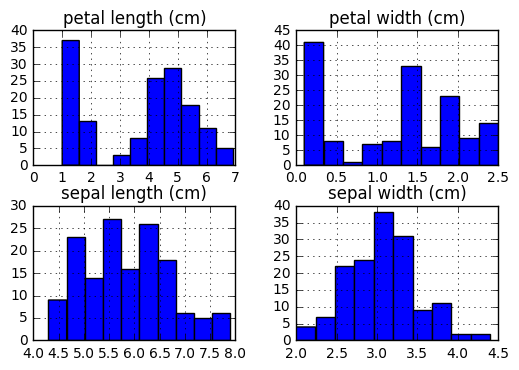

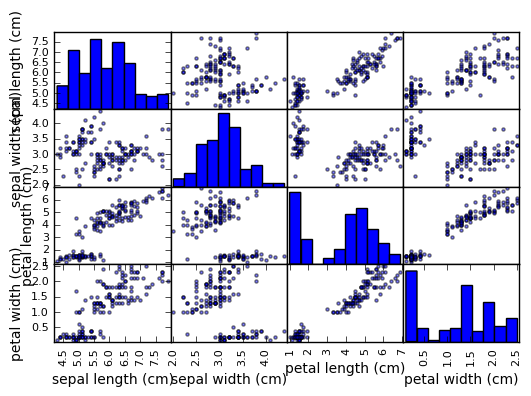

In [29]:
%matplotlib inline
drop_cols = ['target', 'names']
df.drop(drop_cols, 1).hist()
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df.drop(drop_cols, 1))

[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


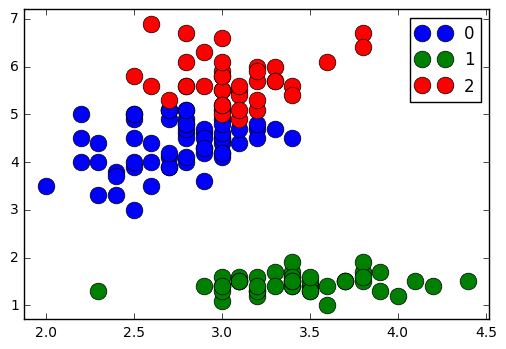

In [30]:
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=3)
mat = df.drop(drop_cols, 1).as_matrix()
km.fit(mat)
df['labels'] = km.labels_

groups = df.groupby('labels')
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.iloc[:, 1], group.iloc[:, 2], marker='o', linestyle='', ms=12, label=name)
ax.legend()
print km.cluster_centers_

plt.show()

In [53]:
# http://orbi.ulg.ac.be/bitstream/2268/154357/1/paper.pdf
# http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html
df['target_binary'] = df.names.map(lambda x: 0 if x == 'I. setosa' else 1)
num_attribs = df.columns[0:4]
cat_attribs = ['target_binary']

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV <- dependent on version of sklearn
from sklearn.grid_search import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [50]:
df_train = df.sample(frac=0.7)
df_test = df[~df.isin(df_train)].dropna()
print df_train.head()
print df_test.head()

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
32                5.2               4.1                1.5               0.1   
63                6.1               2.9                4.7               1.4   
0                 5.1               3.5                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
39                5.1               3.4                1.5               0.2   

    target          names  labels  target_binary  
32       0      I. setosa       1              0  
63       1  I. versicolor       0              1  
0        0      I. setosa       1              0  
5        0      I. setosa       1              0  
39       0      I. setosa       1              0  
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6              

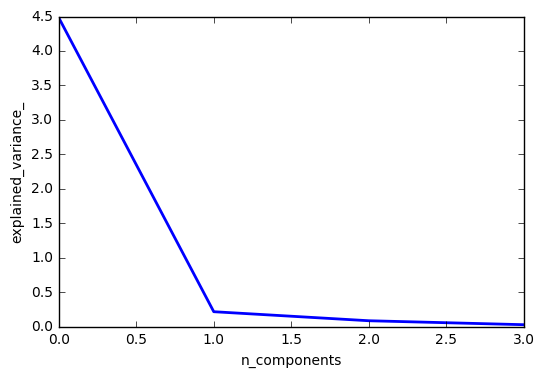

In [63]:
pca.fit(df_train[num_attribs])

plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [145]:
n_components = [1, 2, 3]
Cs = np.logspace(-4, 4, 3)
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(df_train[num_attribs], df_train['target_binary'])
print "Number of components =", estimator.best_estimator_.named_steps['pca'].n_components

print 'coef =', estimator.best_estimator_.steps[1][1].coef_[0]
print 'intercept =', estimator.best_estimator_.steps[1][1].intercept_
estimator.best_estimator_.steps[1][1]
pred_prob = estimator.best_estimator_.predict_proba(df_test[num_attribs])
from sklearn.metrics import log_loss
ll = log_loss(df_test['target_binary'], pred_prob)
print 'Log Loss error =', ll

Number of components = 2
coef = [ 2.0254044   1.10874295]
intercept = [ 1.65461392]
Log Loss error = 0.0403891618051
